# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [7]:
df = pd.read_csv('/Users/mollygoldwasser/Downloads/MDST-Tutorial-Redesign-main-2/data/states_edu.csv')
print (df)

             PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659028.0       715680.0          

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
df = pd.read_csv('/Users/mollygoldwasser/Downloads/MDST-Tutorial-Redesign-main-2/data/states_edu.csv')
df.rename({
     'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
}, axis=1,inplace=True)
print(df)
#drops rows of states that don't have enrollment of 12th grade, primary school, or average math 8 scores ]
#df.dropna(subset=['ENROLL_PRIMARY','ENROLL_12', 'AVG_MATH_8_SCORE'], inplace=True)

#setting up a new column for state expenditure per student
df['DIFFERENCE_ENROLL'] = df['ENROLL_PRIMARY'] - df['ENROLL_12']

print(df["YEAR"].nunique())

             PRIMARY_KEY          STATE  YEAR  ENROLL_ALL_EST  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992             NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992             NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992             NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992             NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992             NaN     26260025.0   
...                  ...            ...   ...             ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019             NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019             NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019             NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019             NaN            NaN   
1714        2019_WYOMING        WYOMING  2019             NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  L

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: AVG_MATH_8_SCORE

How many years of data are logged in our dataset? 

In [1]:
33 (code in previous box)

NameError: name 'df' is not defined

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [3]:
#drop rows that are missing outcome score
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
#find average math score for each state across all years
avg_math = df.groupby ("STATE")["AVG_MATH_8_SCORE"].mean()

print(avg_math.loc["MICHIGAN"])
print(avg_math.loc["OHIO"])


#Ohio has a higher average outcome score

276.1666666666667
282.25


Find the average for your outcome score across all states in 2019

In [4]:
states2019 = df[df["YEAR"] == 2019]
states2019["AVG_MATH_8_SCORE"].mean()

281.2641509433962

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [5]:
df.groupby("STATE")["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [6]:
df['PERC_EXPENDITURE'] = df["INSTRUCTION_EXPENDITURE"]/ df["TOTAL_EXPENDITURE"]
print (df)
#I added this column as a measure of the state's level of priority of education and figured that this percentage would factor in differences ranging between different sizes of states

             PRIMARY_KEY          STATE  YEAR  ENROLL_ALL_EST  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992             NaN      2678885.0   
2           1992_ARIZONA        ARIZONA  1992             NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992             NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992             NaN     26260025.0   
5          1992_COLORADO       COLORADO  1992             NaN      3185173.0   
...                  ...            ...   ...             ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019             NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019             NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019             NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019             NaN            NaN   
1714        2019_WYOMING        WYOMING  2019             NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  L

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot:xlabel='AVG_READING_8_SCORE', ylabel='AVG_MATH_8_SCORE'>

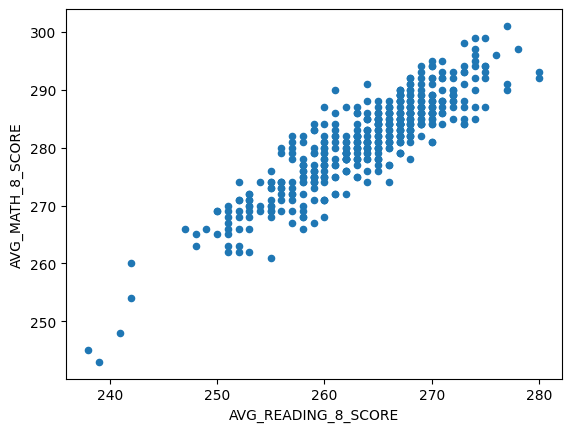

In [8]:

df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE')


there is a strong positive correlation between average 8 math and reading scores

**Visualization 2**

<AxesSubplot:xlabel='PERC_EXPENDITURE_PER_STUDENT', ylabel='AVG_MATH_8_SCORE'>

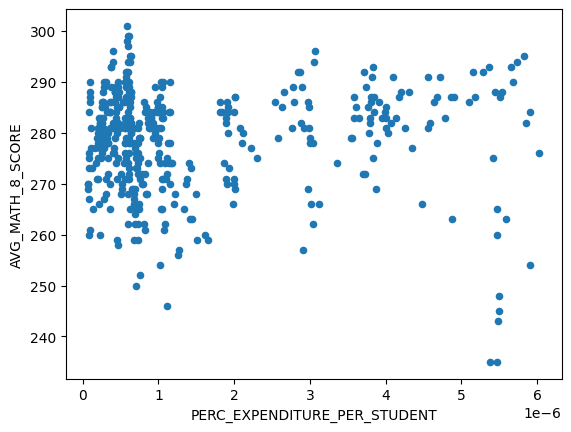

In [7]:

df["PERC_EXPENDITURE_PER_STUDENT"] = df["PERC_EXPENDITURE"]/df["ENROLL_ALL"]
df.plot.scatter(x='PERC_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE')



There is a slight correlation, as the percent of expenditure spent on education per student increases, so does the average math 8 score.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [9]:
from sklearn.model_selection import train_test_split


In [11]:
from sklearn.model_selection import train_test_split
X = df[['AVG_READING_8_SCORE',"PERC_EXPENDITURE_PER_STUDENT"]].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [47]:
#X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [28]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [29]:
# create your model here
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

LinearRegression()


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [39]:
print(model.intercept_)
print(model.coef_)
print(model.score(X_test, y_test))
np.mean(model.predict(X_test)-y_test)
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

-19.36757305447469
[1.14022363e+00 4.64731085e+04]
0.7915197693408971


2.826016621151656

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [38]:
#I tried importing specifically from matplotlib and then not putting plt and that still didn't work so idk why it is not callable
col_name = 'AVG_READING_8_SCORE'
f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

TypeError: 'module' object is not callable

In [25]:
col_name = 'PERC_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")

TypeError: 'module' object is not callable

<h2> Summary </h2>

I investigated average math 8 scores and how they are affected by the percent expenditure spent by each state on location, as well as the average reading 8 scores. There was not a correlation between the fraction of expenditure spent on education, but there was more of a pattern when I divided that value by the number of students in each state, so that states with more students who spent more of their expenditure on education to provide for the additional students were more standardized to states with fewer students that didn't need to spend as much of their spending on education. This had a slight positive correlation. The average 8 reading scores and math scores had a strong positive correlation. My model had an absolute mean error of 2.826 points, which I feel is pretty good for predictng the average math score.